<a href="https://colab.research.google.com/github/LUCY-JungHwaKim/DataAnalysis/blob/main/Part2_Chap5_N3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/AnalyticsKnight/yemoonsaBigdata

Cloning into 'yemoonsaBigdata'...
remote: Enumerating objects: 485, done.
remote: Counting objects: 100% (122/122), done.
remote: Compressing objects: 100% (78/78), done.
remote: Total 485 (delta 66), reused 49 (delta 44), pack-reused 363
Receiving objects: 100% (485/485), 8.89 MiB | 15.69 MiB/s, done.
Resolving deltas: 100% (251/251), done.


In [2]:
import pandas as pd

X_test = pd.read_csv('./yemoonsaBigdata/datasets/Part2/stellar_X_test.csv')
X_train = pd.read_csv('./yemoonsaBigdata/datasets/Part2/stellar_X_train.csv')
y_train = pd.read_csv('./yemoonsaBigdata/datasets/Part2/stellar_y_train.csv')

In [3]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   alpha     30000 non-null  float64
 1   delta     30000 non-null  float64
 2   u         30000 non-null  float64
 3   g         30000 non-null  float64
 4   r         30000 non-null  float64
 5   i         30000 non-null  float64
 6   z         30000 non-null  float64
 7   redshift  30000 non-null  float64
 8   run_ID    30000 non-null  int64  
 9   rerun_ID  30000 non-null  int64  
 10  cam_col   30000 non-null  int64  
 11  field_ID  30000 non-null  int64  
 12  plate     30000 non-null  int64  
dtypes: float64(8), int64(5)
memory usage: 3.0 MB


In [4]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_proc = scaler.fit_transform(X_train)
X_test_proc = scaler.transform(X_test)

In [5]:
from sklearn.model_selection import train_test_split

X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.3)

In [6]:
y_tr

,galaxy
67936,1
13701,1
69841,0
21440,1
55771,0
...,...
13023,1
55710,1
51836,0
6047,1


In [7]:
## knn 사용
from sklearn.neighbors import KNeighborsClassifier

modelKNN = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
modelKNN.fit(X_tr, y_tr.values.ravel()) ## ravel : 다차원 배열을 1차원 배열로 평평하게 만들어 주는 것

KNeighborsClassifier(metric='euclidean')

In [8]:
from sklearn.tree import DecisionTreeClassifier

modelDT = DecisionTreeClassifier()
modelDT.fit(X_tr, y_tr.values.ravel())

DecisionTreeClassifier()

In [9]:
## 데이터 모형 평가

y_val_pred_probaKNN = modelKNN.predict_proba(X_val)
y_val_pred_probaDT = modelDT.predict_proba(X_val)

In [10]:
## 모델 성능 평가
from sklearn.metrics import roc_auc_score
scoreKNN = roc_auc_score(y_val, y_val_pred_probaKNN[:, 1])
scoreDT = roc_auc_score(y_val, y_val_pred_probaDT[:, 1])

In [11]:
scoreKNN, scoreDT

(0.8420482400532552, 0.9640442997904873)

In [12]:
y_tst_pred = modelDT.predict(X_test)
y_tst_pred

array([1, 0, 1, ..., 1, 0, 1])

In [13]:
result = pd.DataFrame()
result['galaxy'] = y_tst_pred
result

,galaxy
0,1
1,0
2,1
3,1
4,0
...,...
29995,1
29996,0
29997,1
29998,0


In [14]:
#result.to_csv('')

## 답지

In [15]:
X_train.describe()

,alpha,delta,u,g,r,i,z,redshift,run_ID,rerun_ID,cam_col,field_ID,plate
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.0,70000.000000,70000.000000,70000.000000
mean,177.535809,24.107885,21.938806,20.486718,19.644011,19.082969,18.624590,0.575246,4478.649443,301.0,3.510500,186.045714,5127.852900
std,96.483093,19.665057,37.942814,37.925201,1.852053,1.755997,37.904705,0.729921,1965.326847,0.0,1.585203,148.661268,2947.452991
min,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,-0.009971,109.000000,301.0,1.000000,11.000000,266.000000
25%,127.385304,5.115922,20.349987,18.957325,18.136183,17.733732,17.463838,0.052602,3185.000000,301.0,2.000000,82.000000,2525.750000
50%,180.706865,23.579507,22.183860,21.095445,20.122805,19.399590,19.001010,0.422838,4188.000000,301.0,4.000000,146.000000,4978.000000
75%,233.942154,39.871336,23.684145,22.121073,21.039012,20.391340,19.917578,0.700399,5326.000000,301.0,5.000000,241.000000,7389.000000
max,359.999615,82.947622,32.781390,31.602240,29.571860,32.141470,28.790550,7.011245,8162.000000,301.0,6.000000,989.000000,12547.000000


In [16]:
## min값에서 -9999가 이상해보임 --> 이상치 제거
y_train = y_train.loc[(X_train.u != -9999) & (X_train.g != -9999) & (X_train.z != -9999)]
X_train = X_train.loc[(X_train.u != -9999) & (X_train.g != -9999) & (X_train.z != -9999)]


In [17]:
X_train.describe()

,alpha,delta,u,g,r,i,z,redshift,run_ID,rerun_ID,cam_col,field_ID,plate
count,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.0,69999.000000,69999.000000,69999.000000
mean,177.535145,24.108238,22.081964,20.629856,19.644032,19.082984,18.767701,0.575254,4478.702681,301.0,3.510522,186.040701,5127.878813
std,96.483622,19.664976,2.248554,2.033576,1.852057,1.756005,1.764734,0.729923,1965.290408,0.0,1.585204,148.656411,2947.466071
min,0.005528,-18.785328,10.996230,10.498200,9.822070,9.469903,9.612333,-0.009971,109.000000,301.0,1.000000,11.000000,266.000000
25%,127.384192,5.117238,20.350000,18.957435,18.136075,17.733685,17.463885,0.052608,3185.000000,301.0,2.000000,82.000000,2525.500000
50%,180.705886,23.580630,22.183900,21.095450,20.122810,19.399590,19.001020,0.422848,4188.000000,301.0,4.000000,146.000000,4978.000000
75%,233.942330,39.872079,23.684160,22.121075,21.039035,20.391350,19.917595,0.700399,5326.000000,301.0,5.000000,241.000000,7389.000000
max,359.999615,82.947622,32.781390,31.602240,29.571860,32.141470,28.790550,7.011245,8162.000000,301.0,6.000000,989.000000,12547.000000


In [18]:
y_train.reset_index(inplace=True, drop=True)
X_train.reset_index(inplace=True, drop=True)
# 인덱스 재정렬

In [19]:
X_train['redshift'].quantile([q/100 for q in range(90,100)])
## 약 2%만이 3을 넘음

0.90    1.566266
0.91    1.675948
0.92    1.786824
0.93    1.910857
0.94    2.041589
0.95    2.186017
0.96    2.323494
0.97    2.485796
0.98    2.713839
0.99    3.116165
Name: redshift, dtype: float64

(array([2.7942e+04, 8.7070e+03, 1.5564e+04, 5.7750e+03, 2.1250e+03,
        1.7370e+03, 1.5390e+03, 1.4540e+03, 1.2150e+03, 1.1700e+03,
        9.4500e+02, 6.1200e+02, 4.0800e+02, 3.0300e+02, 1.3500e+02,
        7.5000e+01, 5.7000e+01, 4.3000e+01, 1.7000e+01, 1.4000e+01,
        1.1000e+01, 1.4000e+01, 9.0000e+00, 2.1000e+01, 1.2000e+01,
        1.1000e+01, 1.5000e+01, 2.9000e+01, 1.8000e+01, 2.2000e+01]),
 array([-0.00997067,  0.22406986,  0.45811038,  0.6921509 ,  0.92619142,
         1.16023194,  1.39427247,  1.62831299,  1.86235351,  2.09639403,
         2.33043456,  2.56447508,  2.7985156 ,  3.03255612,  3.26659664,
         3.50063717,  3.73467769,  3.96871821,  4.20275873,  4.43679926,
         4.67083978,  4.9048803 ,  5.13892082,  5.37296134,  5.60700187,
         5.84104239,  6.07508291,  6.30912343,  6.54316396,  6.77720448,
         7.011245  ]),
 <a list of 30 Patch objects>)

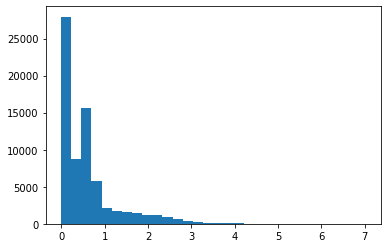

In [20]:
import matplotlib.pyplot as plt

plt.hist(X_train.redshift, bins=30)

In [23]:
import numpy as np

X_train['redshift_upper3'] = np.where(X_train['redshift'] > 3, 1, 0)
X_test['redshift_upper3'] = np.where(X_test['redshift'] > 3, 1, 0)

In [24]:
## 명목형 변수 레이블 인코딩
from sklearn.preprocessing import LabelEncoder
X = pd.concat([X_train, X_test])

COL_CAT = ['run_ID', 'rerun_ID', 'cam_col', 'field_ID', 'plate', 'redshift_upper3']

for _col in COL_CAT:
  le = LabelEncoder()
  le.fit(X[_col])
  X_train[_col] = le.transform(X_train[_col])
  X_test[_col] = le.transform(X_test[_col])

In [25]:
## 데이터 분리
from sklearn.model_selection import train_test_split

X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.3, stratify=y_train)

In [26]:
## 스켈링 진행
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

COL_NUM = ['alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'redshift']

X_tr[COL_NUM] = scaler.fit_transform(X_tr[COL_NUM])
X_val[COL_NUM] = scaler.transform(X_val[COL_NUM])
X_test[COL_NUM] = scaler.transform(X_test[COL_NUM])

In [27]:
## 분류 모델 학습
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier()
model_rf.fit(X_tr, y_tr.values.ravel())

RandomForestClassifier()

In [29]:
from xgboost import XGBClassifier

model_xgb1 = XGBClassifier()
model_xgb1.fit(X_tr, y_tr.values.ravel())

XGBClassifier()

In [37]:
from sklearn.metrics import classification_report, roc_auc_score

y_pred_rf = model_rf.predict_proba(X_val)
y_pred_xgb1 = model_xgb1.predict_proba(X_val)

y_predrflabel = model_rf.predict(X_val)
y_predxgblabel = model_xgb1.predict(X_val)

print("RandomClassifier")
print(classification_report(y_val, y_predrflabel, labels=[0,1]))
print("RF_rocaucscore")
print(roc_auc_score(y_val, y_pred_rf[:,1]))
print("XGBoost")
print(classification_report(y_val, y_predxgblabel, labels=[0,1]))
print("XGBoost_rocaucscore")
print(roc_auc_score(y_val, y_pred_xgb1[:,1]))

RandomClassifier
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      8530
           1       0.98      0.98      0.98     12470

    accuracy                           0.98     21000
   macro avg       0.98      0.97      0.98     21000
weighted avg       0.98      0.98      0.98     21000

RF_rocaucscore
0.9942466045120246
XGBoost
              precision    recall  f1-score   support

           0       0.98      0.94      0.96      8530
           1       0.96      0.98      0.97     12470

    accuracy                           0.97     21000
   macro avg       0.97      0.96      0.97     21000
weighted avg       0.97      0.97      0.97     21000

XGBoost_rocaucscore
0.9912648269093185


In [40]:
## feature_importance
pd.DataFrame({'feature':X_tr.columns, 'fi_rf':model_rf.feature_importances_}) #  'fi_xgb':model_xgb1.feature_imporatnces_

,feature,fi_rf
0,alpha,0.013903
1,delta,0.014512
2,u,0.080986
3,g,0.076797
4,r,0.046708
5,i,0.072276
6,z,0.092761
7,redshift,0.504867
8,run_ID,0.011390
9,rerun_ID,0.000000


In [44]:
## 실제 테스트 값 이용해서 분류
pred = model_rf.predict(X_test)
pred[:20]

array([1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1])

In [45]:
## 결과 데이터 저장
pd.DataFrame({'target':pred}).to_csv('./x.csv', index=False)

## 제 2유형 순서

1. 데이터 불러오기 (describe, info 확인)
2. 데이터 전처리
  - 이상치 및 결측치 확인
  - 이상치 제거 및 결측치 대체 (median값으로..?)
  - 데이터 제거했다면 reset_index 필수
  - 파생변수 만들만한게 있는지 값들 분포 확인
  - 수치형 변수 및 범주형 변수 나누기
  - 수치형 변수, 범주형 변수들 의미 있는지 확인
  - 범주형 변수는 레이블인코딩을 통해서 수치형으로 바꿔주기
  - train, validation 데이터로 분리
  - preprocessing 수행 (StandardScaler 또는 MinMaxScaler)
3. 모델 지정
  - RandomForestClassifier
  - DecisionTreeClassifier
  - LinearRegression
  - SVR
  - KNeighborsClassifier
  - XGBClassifier (xgboost)
4. 모델 성능 평가
  - roc_auc_score
  - validaion으로 예측한 값과 실제 값이 맞는지 확인
  - 변수 중요도 확인
5. 모델 테스트
  - 테스트용 데이터로 결과 추출 후 엑셀 파일 저장

In [ ]:
ㅋㅋ